In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Gaussian Function

### Generate Data

In [3]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.25, 0.02) - gaussian(x, 0.75, 0.02)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


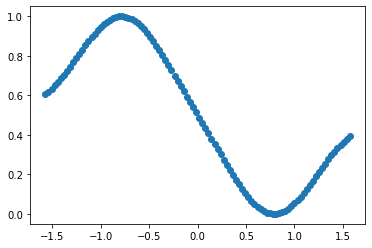

In [4]:
plt.plot(x_qnn, y, 'o')
plt.show()

### Training Models

In [5]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)
    
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10756772041964606
epoch: 1, loss: 0.08472352253196841
epoch: 2, loss: 0.06513384000207995
epoch: 3, loss: 0.053847436095626214
epoch: 4, loss: 0.04732092353085084
epoch: 5, loss: 0.040712028291198174
epoch: 6, loss: 0.032319690332919586
epoch: 7, loss: 0.02350238777851792
epoch: 8, loss: 0.01650801890263716
epoch: 9, loss: 0.012594840989411792
epoch: 10, loss: 0.01126608488820943
epoch: 11, loss: 0.010773602977232382
epoch: 12, loss: 0.010280098685411831
epoch: 13, loss: 0.01002997234644193
epoch: 14, loss: 0.009746780568587778
epoch: 15, loss: 0.009158113675563153
epoch: 16, loss: 0.008688767645956472
epoch: 17, loss: 0.008608604254939823
epoch: 18, loss: 0.008770226995818142
epoch: 19, loss: 0.00890776938086217
epoch: 20, loss: 0.008899914109474955
epoch: 21, loss: 0.008759766080919672
epoch: 22, loss: 0.008519265598736794
epoch: 23, loss: 0.008194760583872331
epoch: 24, loss: 0.00782116409925287
epoch: 25, loss: 0.007453696020194765
epoch: 26, loss: 0.0071206079970

In [7]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_100"))

In [6]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_10000"))

## 2D function

### Generate Data

In [3]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


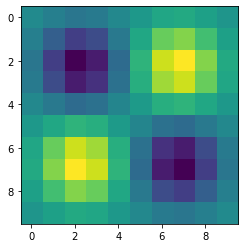

In [4]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [7]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [2, 1],
                         encoder= RZZEncoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_QNN_2D_reps_4"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.06726630157232004
epoch: 1, loss: 0.057192736282336086
epoch: 2, loss: 0.050649972945189525
epoch: 3, loss: 0.04781296860666636
epoch: 4, loss: 0.04730101182953739
epoch: 5, loss: 0.04768763649494786


KeyboardInterrupt: 

In [10]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [4, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.06053292139966247
epoch: 1, loss: 0.04835194275586967
epoch: 2, loss: 0.04582226029657446
epoch: 3, loss: 0.04334438080172202
epoch: 4, loss: 0.039220484715734465
epoch: 5, loss: 0.034686397307269
epoch: 6, loss: 0.030670976685410346
epoch: 7, loss: 0.027034841113276836
epoch: 8, loss: 0.02287660919512585
epoch: 9, loss: 0.019244814227636024
epoch: 10, loss: 0.01744839603420172
epoch: 11, loss: 0.017027410673967115
epoch: 12, loss: 0.017045210169954483
epoch: 13, loss: 0.016621301946025145
epoch: 14, loss: 0.01580948114675065
epoch: 15, loss: 0.015168945421845596
epoch: 16, loss: 0.015731108973812916
epoch: 17, loss: 0.016384429391695102
epoch: 18, loss: 0.01613981382404393
epoch: 19, loss: 0.015172462114230179
epoch: 20, loss: 0.014310082910800437
epoch: 21, loss: 0.013737405539512351
epoch: 22, loss: 0.013303995544703476
epoch: 23, loss: 0.013203905160511571
epoch: 24, loss: 0.013116676741475451
epoch: 25, loss: 0.012687143837100718
epoch: 26, loss: 0.01215940266222

In [12]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [4, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1276206425531826
epoch: 1, loss: 0.06594590333219355
epoch: 2, loss: 0.04636803856464966
epoch: 3, loss: 0.04845327287181595
epoch: 4, loss: 0.04785017492574352
epoch: 5, loss: 0.03864594650138124
epoch: 6, loss: 0.027956827928486073
epoch: 7, loss: 0.021360428053627246
epoch: 8, loss: 0.018052954114806834
epoch: 9, loss: 0.017298460710034394
epoch: 10, loss: 0.016000003133367233
epoch: 11, loss: 0.015170618978832985
epoch: 12, loss: 0.015256656299470825
epoch: 13, loss: 0.01458236319523361
epoch: 14, loss: 0.013675289004790935
epoch: 15, loss: 0.01285492990347118
epoch: 16, loss: 0.011561171781000306
epoch: 17, loss: 0.010324627422611931
epoch: 18, loss: 0.009806168305422705
epoch: 19, loss: 0.009618184227116832
epoch: 20, loss: 0.00964380580911841
epoch: 21, loss: 0.00991411809551177
epoch: 22, loss: 0.01011642640260631
epoch: 23, loss: 0.00994553257669265
epoch: 24, loss: 0.009479675525330643
epoch: 25, loss: 0.009091725906244989
epoch: 26, loss: 0.0089578039103582

In [10]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [2, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_100"))

In [12]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [2, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_10000"))

## 3D function

### Generate Data

In [3]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(216, 1)


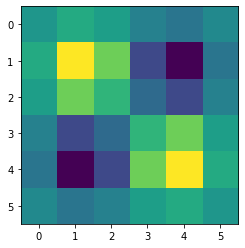

In [4]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3, 1],
                         encoder= RZZEncoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry", "rx"], reps=4),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_QNN_3D_reps_4"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.02616421090110864
epoch: 1, loss: 0.023636985069046455
epoch: 2, loss: 0.023236637796756696
epoch: 3, loss: 0.023091643215221756
epoch: 4, loss: 0.022984223091902883
epoch: 5, loss: 0.022953813798121
epoch: 6, loss: 0.022932075037858372
epoch: 7, loss: 0.022842472661382226
epoch: 8, loss: 0.022722775675088323
epoch: 9, loss: 0.022635718273382583
epoch: 10, loss: 0.022586477097556193
epoch: 11, loss: 0.02253292341518813
epoch: 12, loss: 0.02246195849612422
epoch: 13, loss: 0.02240184601456359
epoch: 14, loss: 0.02238009339864387
epoch: 15, loss: 0.022389465546880944
epoch: 16, loss: 0.022400123979620892
epoch: 17, loss: 0.022399719934812615
epoch: 18, loss: 0.022399106285238165
epoch: 19, loss: 0.022408457233717663
epoch: 20, loss: 0.022422396012902076
epoch: 21, loss: 0.022423179340251134


In [6]:
np.random.seed(42)

qnn_list = []

for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [4, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.03413086149429913
epoch: 1, loss: 0.024813917000044768
epoch: 2, loss: 0.023288908390507103
epoch: 3, loss: 0.02294723033101617
epoch: 4, loss: 0.022817322157137592
epoch: 5, loss: 0.022748717298517403
epoch: 6, loss: 0.02273586136671576
epoch: 7, loss: 0.022720464881048015
epoch: 8, loss: 0.022628373354539082
epoch: 9, loss: 0.02243778174592224
epoch: 10, loss: 0.022148780128218748
epoch: 11, loss: 0.02172794257274075
epoch: 12, loss: 0.021168491241988854
epoch: 13, loss: 0.020684145409854044
epoch: 14, loss: 0.020463002047748254
epoch: 15, loss: 0.02016151031809331
epoch: 16, loss: 0.019651334860756403
epoch: 17, loss: 0.019040345900673942
epoch: 18, loss: 0.01872367018024863
epoch: 19, loss: 0.018474223615551504
epoch: 20, loss: 0.018139041045761018
epoch: 21, loss: 0.017772593976886433
epoch: 22, loss: 0.01726856692062583
epoch: 23, loss: 0.01660218802170632
epoch: 24, loss: 0.0160784782535287
epoch: 25, loss: 0.015680869592557815
epoch: 26, loss: 0.01548798577905

In [5]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)
    qnn.train(x_qnn, y, epochs = 100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.02547056293522781
epoch: 1, loss: 0.021748480600561775
epoch: 2, loss: 0.02051392624587805
epoch: 3, loss: 0.017986821021357603
epoch: 4, loss: 0.01657558984155573
epoch: 5, loss: 0.015298452254258714
epoch: 6, loss: 0.015061575016638596
epoch: 7, loss: 0.012654326540540863
epoch: 8, loss: 0.01250155408462557
epoch: 9, loss: 0.011770037725041234
epoch: 10, loss: 0.011556304504841932
epoch: 11, loss: 0.010922071283222744
epoch: 12, loss: 0.00995043271166552
epoch: 13, loss: 0.009228349764361363
epoch: 14, loss: 0.00918213592265556
epoch: 15, loss: 0.008675155245653744
epoch: 16, loss: 0.00847740024928649
epoch: 17, loss: 0.008374971259114525
epoch: 18, loss: 0.008128651113929292
epoch: 19, loss: 0.007881869039162685
epoch: 20, loss: 0.007627213374917509
epoch: 21, loss: 0.007535481877516642
epoch: 22, loss: 0.008203639066455635
epoch: 23, loss: 0.00833129975423787
epoch: 24, loss: 0.0070757087357955165
epoch: 25, loss: 0.00807517066715739
epoch: 26, loss: 0.00696636072

In [15]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [3, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_100"))

In [16]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [3, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_10000"))

../../src/layers.py:176: RuntimeWarning: overflow encountered in exp
  x = 1 / (1 + np.exp(-x))


### Further training

In [6]:
np.random.seed(42)

qnn_list = loader(data_path("trainability_qnn_3D_reps_1"))

for i in tqdm(range(5)):
    qnn = qnn_list[i]
    qnn.train(x_qnn, y, epochs=100, verbose=True)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1_epochs_200"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.012148431196048063
epoch: 1, loss: 0.011980385371999271
epoch: 2, loss: 0.01179547348901502
epoch: 3, loss: 0.011803022517372697
epoch: 4, loss: 0.012039628532458262
epoch: 5, loss: 0.011928511686742336
epoch: 6, loss: 0.011766001574135777
epoch: 7, loss: 0.011627308652327785
epoch: 8, loss: 0.011673681182331806
epoch: 9, loss: 0.011709354036838758
epoch: 10, loss: 0.012002848617721613
epoch: 11, loss: 0.011750310299730561
epoch: 12, loss: 0.011712583025981457
epoch: 13, loss: 0.011647812518401872
epoch: 14, loss: 0.011715479992813816
epoch: 15, loss: 0.011651864716776402
epoch: 16, loss: 0.011669518449077897
epoch: 17, loss: 0.011868135152118568
epoch: 18, loss: 0.011818297423394306
epoch: 19, loss: 0.01158188390739788
epoch: 20, loss: 0.011635109811138576
epoch: 21, loss: 0.011891986178606971
epoch: 22, loss: 0.012042224803234176
epoch: 23, loss: 0.011636656517251908
epoch: 24, loss: 0.011894149943480592
epoch: 25, loss: 0.011492520239619528
epoch: 26, loss: 0.01155

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.011395458044639048
epoch: 1, loss: 0.011496587908272828
epoch: 2, loss: 0.011623204234763637
epoch: 3, loss: 0.01158552805269232
epoch: 4, loss: 0.011621900008657114
epoch: 5, loss: 0.011579825815756308
epoch: 6, loss: 0.01185262536970564
epoch: 7, loss: 0.011615885598159641
epoch: 8, loss: 0.01185320951515932
epoch: 9, loss: 0.01160423213636829
epoch: 10, loss: 0.01154905729880759
epoch: 11, loss: 0.011639819616046328
epoch: 12, loss: 0.011441296690776436
epoch: 13, loss: 0.011902209654550976
epoch: 14, loss: 0.011477121009212379
epoch: 15, loss: 0.011518714071355724
epoch: 16, loss: 0.011381966281987456
epoch: 17, loss: 0.011650268387657576
epoch: 18, loss: 0.01154835573475249
epoch: 19, loss: 0.011780363476037734
epoch: 20, loss: 0.01162627459332815
epoch: 21, loss: 0.01158554859965728
epoch: 22, loss: 0.011388225538858321
epoch: 23, loss: 0.011406276081277948
epoch: 24, loss: 0.01142429999733119
epoch: 25, loss: 0.011501150683861565
epoch: 26, loss: 0.011603640138

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.012830170917000623
epoch: 1, loss: 0.013286565079975712
epoch: 2, loss: 0.01301810982753995
epoch: 3, loss: 0.01273164277419426
epoch: 4, loss: 0.01267885769286802
epoch: 5, loss: 0.012823909658653453
epoch: 6, loss: 0.012721512032123778
epoch: 7, loss: 0.01264640601450535
epoch: 8, loss: 0.012784840918092491
epoch: 9, loss: 0.012907591716778754
epoch: 10, loss: 0.012706501256430589
epoch: 11, loss: 0.012931533239427294
epoch: 12, loss: 0.01289799948993595
epoch: 13, loss: 0.013033845884075922
epoch: 14, loss: 0.01270486511734362
epoch: 15, loss: 0.01265102168302442
epoch: 16, loss: 0.012693962311738739
epoch: 17, loss: 0.013225700332664472
epoch: 18, loss: 0.012849707211142631
epoch: 19, loss: 0.013038383655306785
epoch: 20, loss: 0.012702711546881485
epoch: 21, loss: 0.013202811422779726
epoch: 22, loss: 0.012641849822219033
epoch: 23, loss: 0.012882969087052623
epoch: 24, loss: 0.013171958659441305
epoch: 25, loss: 0.012968439417150975
epoch: 26, loss: 0.0130386604

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.00757305037939131
epoch: 1, loss: 0.00810400250648579
epoch: 2, loss: 0.008193873022896531
epoch: 3, loss: 0.007331170637551201
epoch: 4, loss: 0.00698308776212629
epoch: 5, loss: 0.007165659768309427
epoch: 6, loss: 0.007310049787245225
epoch: 7, loss: 0.006760884523997457
epoch: 8, loss: 0.00700884917138737
epoch: 9, loss: 0.006655376276473736
epoch: 10, loss: 0.006505260537951875
epoch: 11, loss: 0.006508849878684826
epoch: 12, loss: 0.007001350591818453
epoch: 13, loss: 0.006568007832344526
epoch: 14, loss: 0.0066333885427617
epoch: 15, loss: 0.007127913958471139
epoch: 16, loss: 0.006856543404083683
epoch: 17, loss: 0.006810416019816984
epoch: 18, loss: 0.00650199319542083
epoch: 19, loss: 0.006731507717234488
epoch: 20, loss: 0.006424400554131115
epoch: 21, loss: 0.006554225432557837
epoch: 22, loss: 0.0065547057219452155
epoch: 23, loss: 0.00658667260102222
epoch: 24, loss: 0.0064546770864141526
epoch: 25, loss: 0.006649045133827209
epoch: 26, loss: 0.006549927

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.008969581782736121
epoch: 1, loss: 0.008990403219843431
epoch: 2, loss: 0.008950523233613623
epoch: 3, loss: 0.008989770207221673
epoch: 4, loss: 0.00912623588076741
epoch: 5, loss: 0.008862800969600538
epoch: 6, loss: 0.008962413682313139
epoch: 7, loss: 0.008990016220524592
epoch: 8, loss: 0.009013208473416901
epoch: 9, loss: 0.009120436046291765
epoch: 10, loss: 0.008966136350913322
epoch: 11, loss: 0.009035606635332913
epoch: 12, loss: 0.009037520082946893
epoch: 13, loss: 0.008757138841433799
epoch: 14, loss: 0.0088387335276872
epoch: 15, loss: 0.008871449880655883
epoch: 16, loss: 0.008920015591073438
epoch: 17, loss: 0.009014859992911892
epoch: 18, loss: 0.009217522304935322
epoch: 19, loss: 0.00908088926186342
epoch: 20, loss: 0.008895946925540117
epoch: 21, loss: 0.008958517857740402
epoch: 22, loss: 0.009140115659516973
epoch: 23, loss: 0.008904817737129265
epoch: 24, loss: 0.00907392866136311
epoch: 25, loss: 0.009026199667109498
epoch: 26, loss: 0.00906307

In [7]:
np.random.seed(42)

qnn_list = loader(data_path("trainability_qnn_3D_reps_2"))

for i in tqdm(range(5)):
    qnn = qnn_list[i]
    qnn.train(x_qnn, y, epochs=100, verbose=True)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2_epochs_200"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.008746134233797146
epoch: 1, loss: 0.008937596194172405
epoch: 2, loss: 0.009081986034377626
epoch: 3, loss: 0.008913356035676508
epoch: 4, loss: 0.008855881456499522
epoch: 5, loss: 0.0090878548651503
epoch: 6, loss: 0.00903318791048731
epoch: 7, loss: 0.008972101147966675
epoch: 8, loss: 0.008797889716290306
epoch: 9, loss: 0.008860376932476042
epoch: 10, loss: 0.009090441798964188
epoch: 11, loss: 0.008985500336858689
epoch: 12, loss: 0.008907518800971678
epoch: 13, loss: 0.008848379263234084
epoch: 14, loss: 0.009143261966099983
epoch: 15, loss: 0.00892009940081591
epoch: 16, loss: 0.00908063240543046
epoch: 17, loss: 0.00896665215738498
epoch: 18, loss: 0.008837618267906536
epoch: 19, loss: 0.008855297073471644
epoch: 20, loss: 0.008858821944218805
epoch: 21, loss: 0.008822119436677232
epoch: 22, loss: 0.008849292406866981
epoch: 23, loss: 0.008912835486228494
epoch: 24, loss: 0.00879436061032625
epoch: 25, loss: 0.008715883856657634
epoch: 26, loss: 0.0087958295

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.009055371535323993
epoch: 1, loss: 0.009067331949588534
epoch: 2, loss: 0.009041857263811407
epoch: 3, loss: 0.009077083198140027
epoch: 4, loss: 0.008988829505578772
epoch: 5, loss: 0.008939845944554194
epoch: 6, loss: 0.008926057478245427
epoch: 7, loss: 0.00904165863835962
epoch: 8, loss: 0.009083069868847906
epoch: 9, loss: 0.008917295097869414
epoch: 10, loss: 0.009097310799236083
epoch: 11, loss: 0.008977048601755277
epoch: 12, loss: 0.00913737384679398
epoch: 13, loss: 0.008915762313828079
epoch: 14, loss: 0.009095273208648126
epoch: 15, loss: 0.008875817555474997
epoch: 16, loss: 0.008985186227912475
epoch: 17, loss: 0.008961790222533695
epoch: 18, loss: 0.008931200312599032
epoch: 19, loss: 0.008972477528718952
epoch: 20, loss: 0.00878275723009505
epoch: 21, loss: 0.009029806067163281
epoch: 22, loss: 0.008893867728750617
epoch: 23, loss: 0.008862523072425453
epoch: 24, loss: 0.008964072447301331
epoch: 25, loss: 0.008763632154749146
epoch: 26, loss: 0.008921

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.00989933639338777
epoch: 1, loss: 0.009930869123856505
epoch: 2, loss: 0.010000345571632445
epoch: 3, loss: 0.009994210965177172
epoch: 4, loss: 0.009845751794893665
epoch: 5, loss: 0.009599680874598516
epoch: 6, loss: 0.009531611455659202
epoch: 7, loss: 0.009504027846474743
epoch: 8, loss: 0.009456416855735098
epoch: 9, loss: 0.009217964603137735
epoch: 10, loss: 0.009140590456779155
epoch: 11, loss: 0.008983097365733675
epoch: 12, loss: 0.009159160693452097
epoch: 13, loss: 0.009095798064490747
epoch: 14, loss: 0.008788174313210243
epoch: 15, loss: 0.008884063830072118
epoch: 16, loss: 0.008917762687263865
epoch: 17, loss: 0.008757223377408899
epoch: 18, loss: 0.008814979057955767
epoch: 19, loss: 0.00874464950003251
epoch: 20, loss: 0.008844559854578018
epoch: 21, loss: 0.008826687763995256
epoch: 22, loss: 0.009044861225583786
epoch: 23, loss: 0.008644507727056092
epoch: 24, loss: 0.008677208928179496
epoch: 25, loss: 0.008611019148274321
epoch: 26, loss: 0.00867

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.008102538306410239
epoch: 1, loss: 0.008084062653029354
epoch: 2, loss: 0.008156739522289512
epoch: 3, loss: 0.007813203669178601
epoch: 4, loss: 0.008212897488985757
epoch: 5, loss: 0.008125856080069487
epoch: 6, loss: 0.007953940263476969
epoch: 7, loss: 0.008197058121678237
epoch: 8, loss: 0.008037712353876235
epoch: 9, loss: 0.00810022129593939
epoch: 10, loss: 0.00807393756213914
epoch: 11, loss: 0.008039992669074045
epoch: 12, loss: 0.008038608868575473
epoch: 13, loss: 0.008130989870517493
epoch: 14, loss: 0.008054774462851567
epoch: 15, loss: 0.008133608028869085
epoch: 16, loss: 0.008170270317660858
epoch: 17, loss: 0.00806886705813575
epoch: 18, loss: 0.008170451937802643
epoch: 19, loss: 0.00813750338581141
epoch: 20, loss: 0.008262341522775904
epoch: 21, loss: 0.007882458035645575
epoch: 22, loss: 0.00792411307367969
epoch: 23, loss: 0.008276269515941681
epoch: 24, loss: 0.008115101675799015
epoch: 25, loss: 0.008044732942717294
epoch: 26, loss: 0.00812157

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.006912370323641016
epoch: 1, loss: 0.006783292849428258
epoch: 2, loss: 0.006907514266761174
epoch: 3, loss: 0.007006003363531338
epoch: 4, loss: 0.006954118155741081
epoch: 5, loss: 0.006990239109371334
epoch: 6, loss: 0.0070091614171556614
epoch: 7, loss: 0.006734634441801671
epoch: 8, loss: 0.006981041505693204
epoch: 9, loss: 0.007019075609251479
epoch: 10, loss: 0.006954371361974437
epoch: 11, loss: 0.006935354210318921
epoch: 12, loss: 0.006790149813036379
epoch: 13, loss: 0.006579884227644361
epoch: 14, loss: 0.006760929855448221
epoch: 15, loss: 0.006716719564092678
epoch: 16, loss: 0.006808398180837867
epoch: 17, loss: 0.006874711996305145
epoch: 18, loss: 0.006851420490279158
epoch: 19, loss: 0.006777733609710033
epoch: 20, loss: 0.0066962276636044855
epoch: 21, loss: 0.006598594488226144
epoch: 22, loss: 0.006871275516235155
epoch: 23, loss: 0.006765660637479334
epoch: 24, loss: 0.006614422753377147
epoch: 25, loss: 0.006660332807216115
epoch: 26, loss: 0.0

### Deep QCN

In [13]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(216, 1)


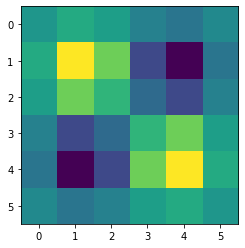

In [14]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [15]:
np.random.seed(42)


qnn = sequential_qnn(n_qubits = [3, 4, 4],
                         dim = [3, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)

qnn.train(x_qnn, y, epochs=200, verbose=True)
    
saver(qnn, data_path("trainability_qnn_3D_deep"))

  0%|          | 0/200 [00:00<?, ?it/s]

epoch: 0, loss: 0.07127398614235778
epoch: 1, loss: 0.03859135820573581
epoch: 2, loss: 0.030764468021473118
epoch: 3, loss: 0.027220754720571776
epoch: 4, loss: 0.02679027360532808
epoch: 5, loss: 0.024991331310244988
epoch: 6, loss: 0.02285660423840059
epoch: 7, loss: 0.02178305827616
epoch: 8, loss: 0.02063444313487282
epoch: 9, loss: 0.019071287919812364
epoch: 10, loss: 0.018074138267264336
epoch: 11, loss: 0.01821947423153643
epoch: 12, loss: 0.01811047410409626
epoch: 13, loss: 0.018165278904042008
epoch: 14, loss: 0.01793703926835272
epoch: 15, loss: 0.0176410844272219
epoch: 16, loss: 0.01730191936388806
epoch: 17, loss: 0.01711680167276803
epoch: 18, loss: 0.016605563645549985
epoch: 19, loss: 0.016833693151009348
epoch: 20, loss: 0.01653656480817363
epoch: 21, loss: 0.01634578939455766
epoch: 22, loss: 0.015500163648678957
epoch: 23, loss: 0.015482478876533165
epoch: 24, loss: 0.015040812347437885
epoch: 25, loss: 0.014641995641454129
epoch: 26, loss: 0.014394075068666752
ep

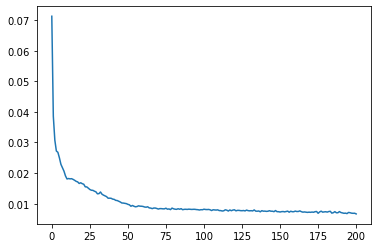

In [17]:
plt.plot(qnn.loss)
#plt.plot(dnn.loss)
plt.show()

### Hybrid Neural Network

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=-2, b=2)

In [ ]:
np.random.seed(42)

layer1 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=1, backend=backend, shots=10000)
layer2 = Dense(n_features=3, n_targets=1, activation=Identity())
layers = [layer1, layer2]
network = NeuralNetwork(layers=layers, optimizer = Adam(lr=0.1))

In [ ]:
network.train(x, y, epochs=100, verbose=True)
saver(network, data_path("trainability_hybrid_2_layer"))

## Single Circuit

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)


In [ ]:
plt.plot(x,y)

In [ ]:
qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)

In [ ]:
qnn.train(x, y, verbose=True)